Setup Jupyter Notebook kernel for SLO data analysis.<br>

In [2]:
import logging as log
import warnings
import time
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# Import custom utility functions.
import slo_twitter_data_analysis_utility_functions_v2 as tweet_util_v2

#############################################################
# Adjust parameters to display all contents.
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.width = None
pd.options.display.max_colwidth = 1000
# Seaborn setting.
sns.set()
# Set level of precision for float value output.
pd.set_option('precision', 12)
# Ignore these types of warnings - don't output to console.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# Matplotlib log settings.
mylog = log.getLogger("matplotlib")
mylog.setLevel(log.INFO)

"""
Turn debug log statements for various sections of code on/off.
(adjust log level as necessary)
"""
log.basicConfig(level=log.INFO)


# Import CSV dataset and convert to dataframe.
tweet_dataframe = tweet_util_v2.import_dataset(
    "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/"
    "twitter-dataset-6-22-19-fixed.csv",
    "csv", False)

d:\dropbox\cs344-ai\venv3.6-64bit\lib\site-packages\IPython\core\interactiveshell.py:3209: DtypeWarning: Columns (36,48) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


# SLO Twitter Data Analysis  - Time Series Statistics

<span style="font-family:Papyrus; font-size:1.25em;">

This function analyzes when a Tweet was created and accrues statistics on the # of Tweets created in the same time period across the entire dataset and by company .<br>

</span>

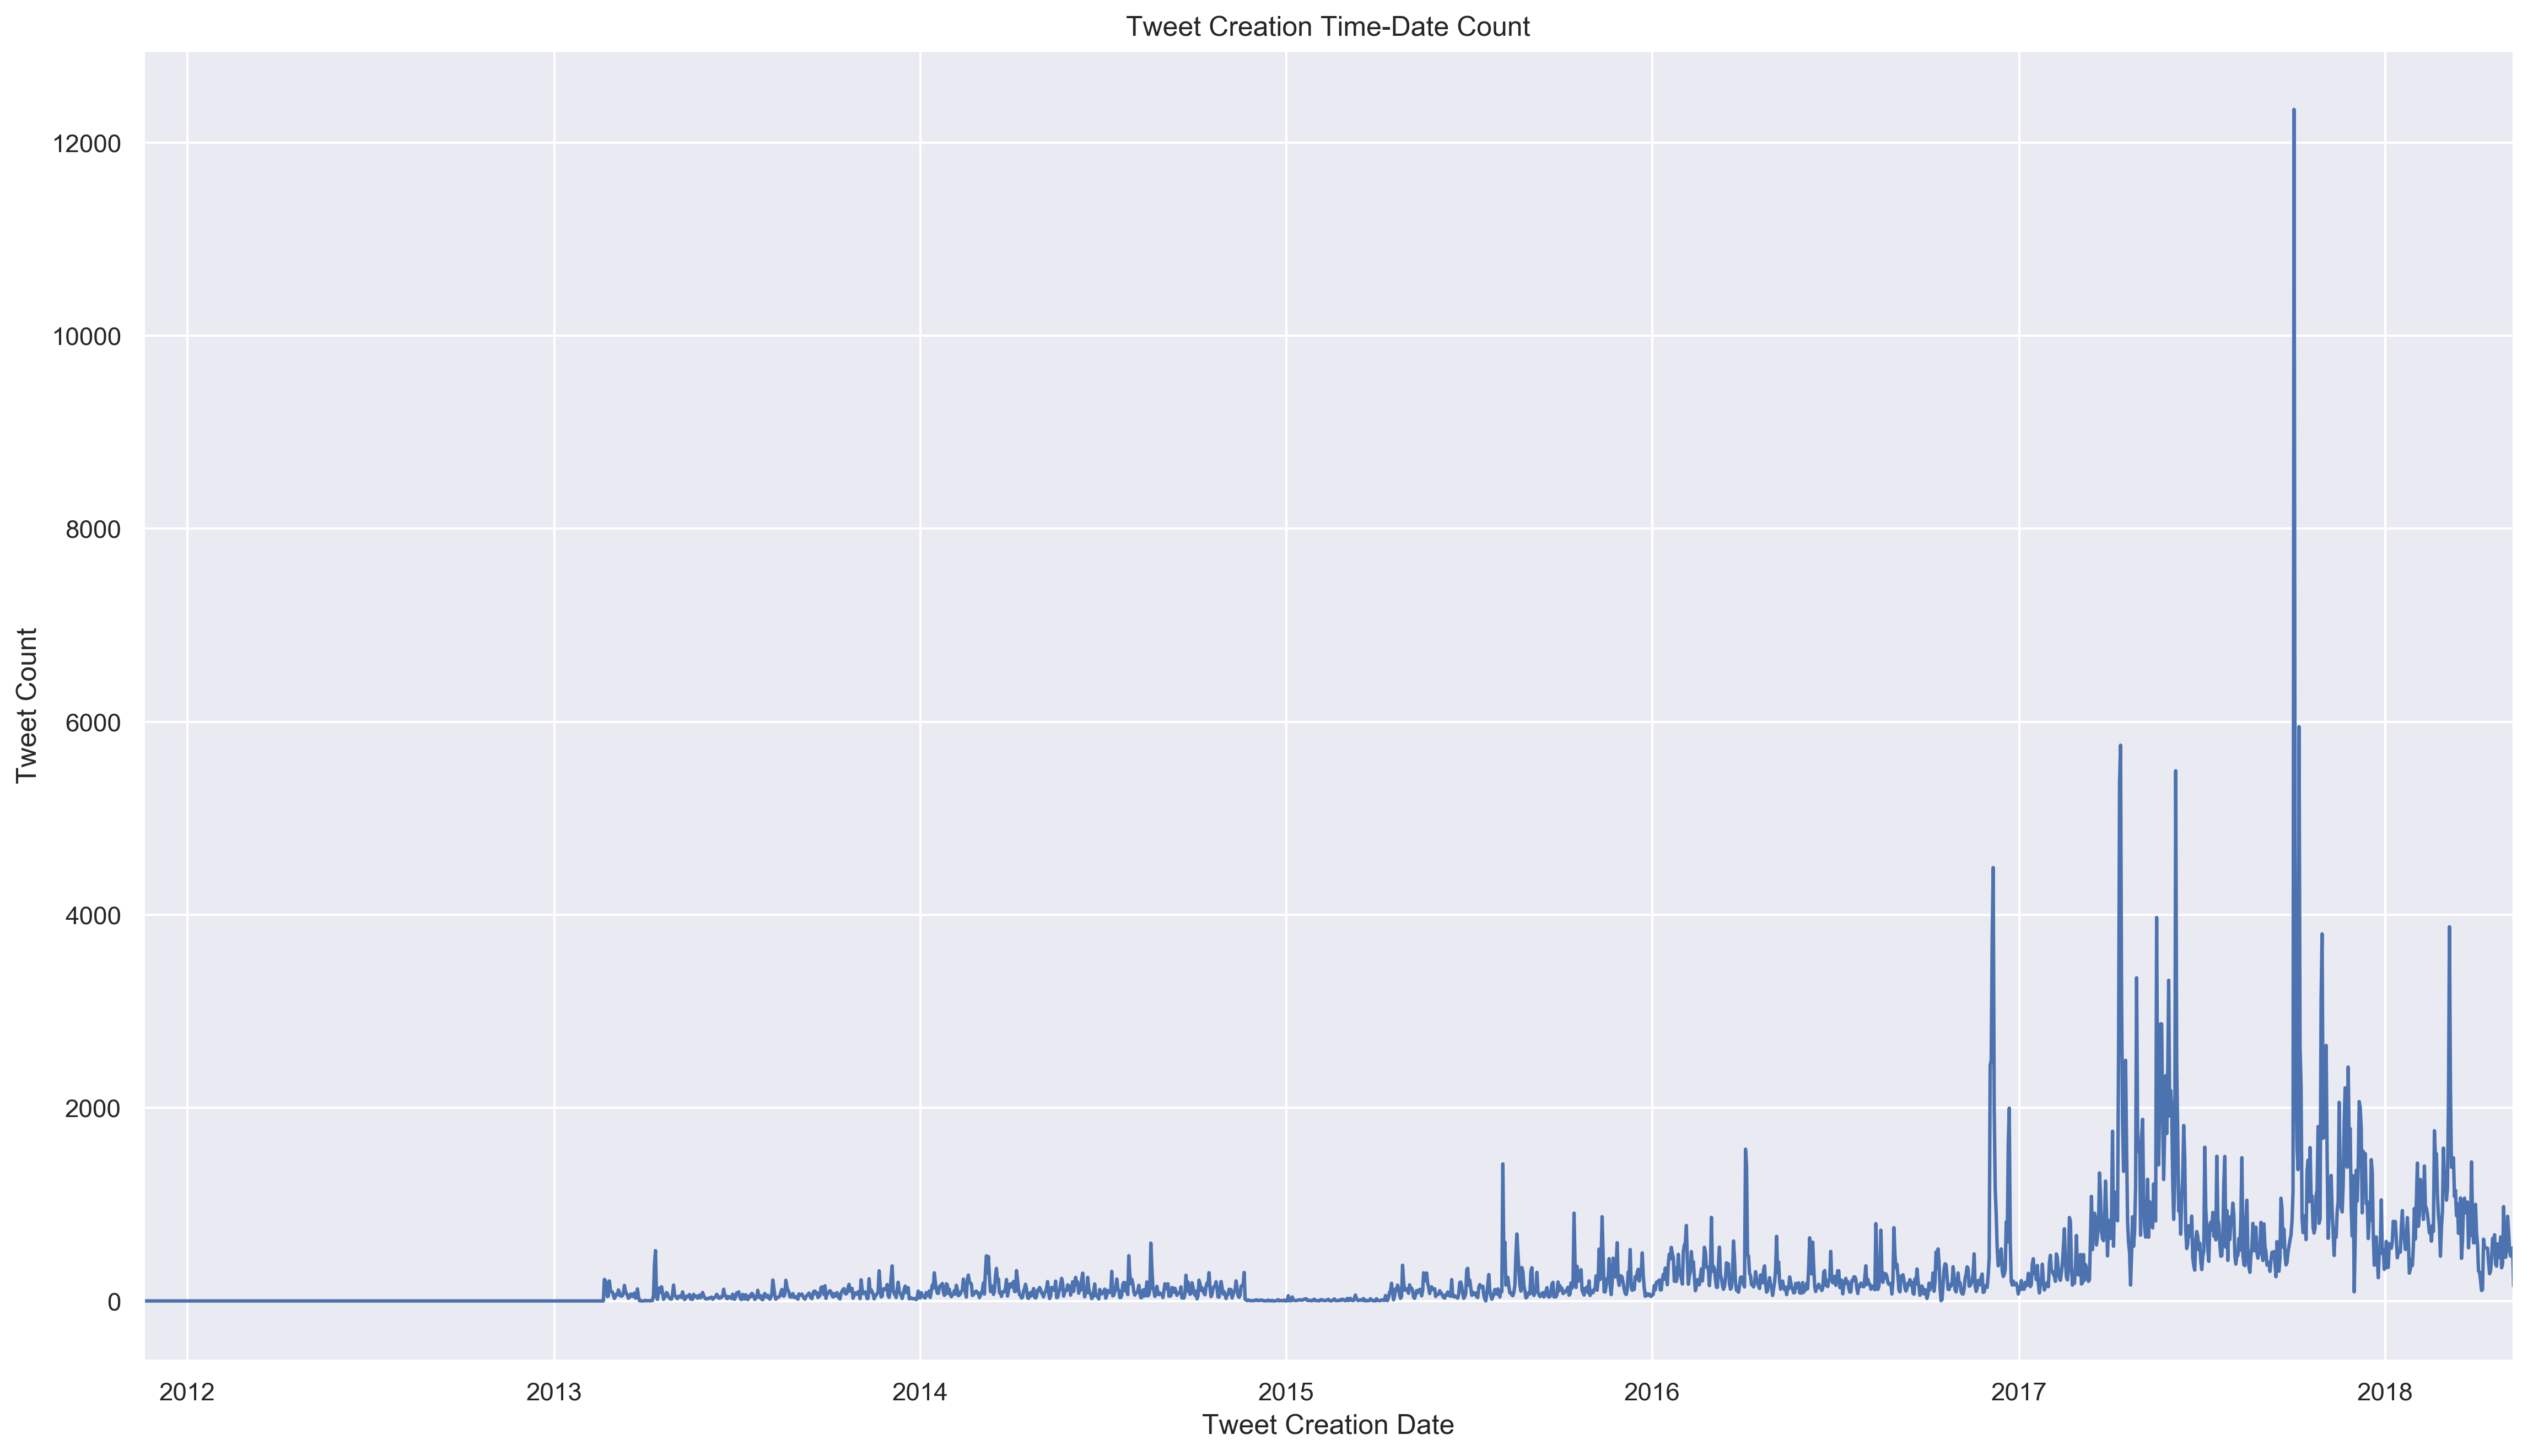

In [3]:
    plt.figure(figsize=(18.5, 10.5), dpi=300)
    plt.title(f"Tweet Creation Time-Date Count")
    plt.xlabel("Tweet Creation Date")
    plt.ylabel("Tweet Count")
    pd.to_datetime(tweet_dataframe['tweet_created_at']).value_counts().resample('1D').sum().plot()
    plt.show()

<span style="font-family:Papyrus; font-size:1.25em;">

We call our data analysis function.  This function utilizes the "tweet_created_at", "company_derived" attributes/fields to compute the time series statistics.<br>

</span>

Tweet Creation Time-Date Count by Company Association


<Figure size 432x288 with 0 Axes>

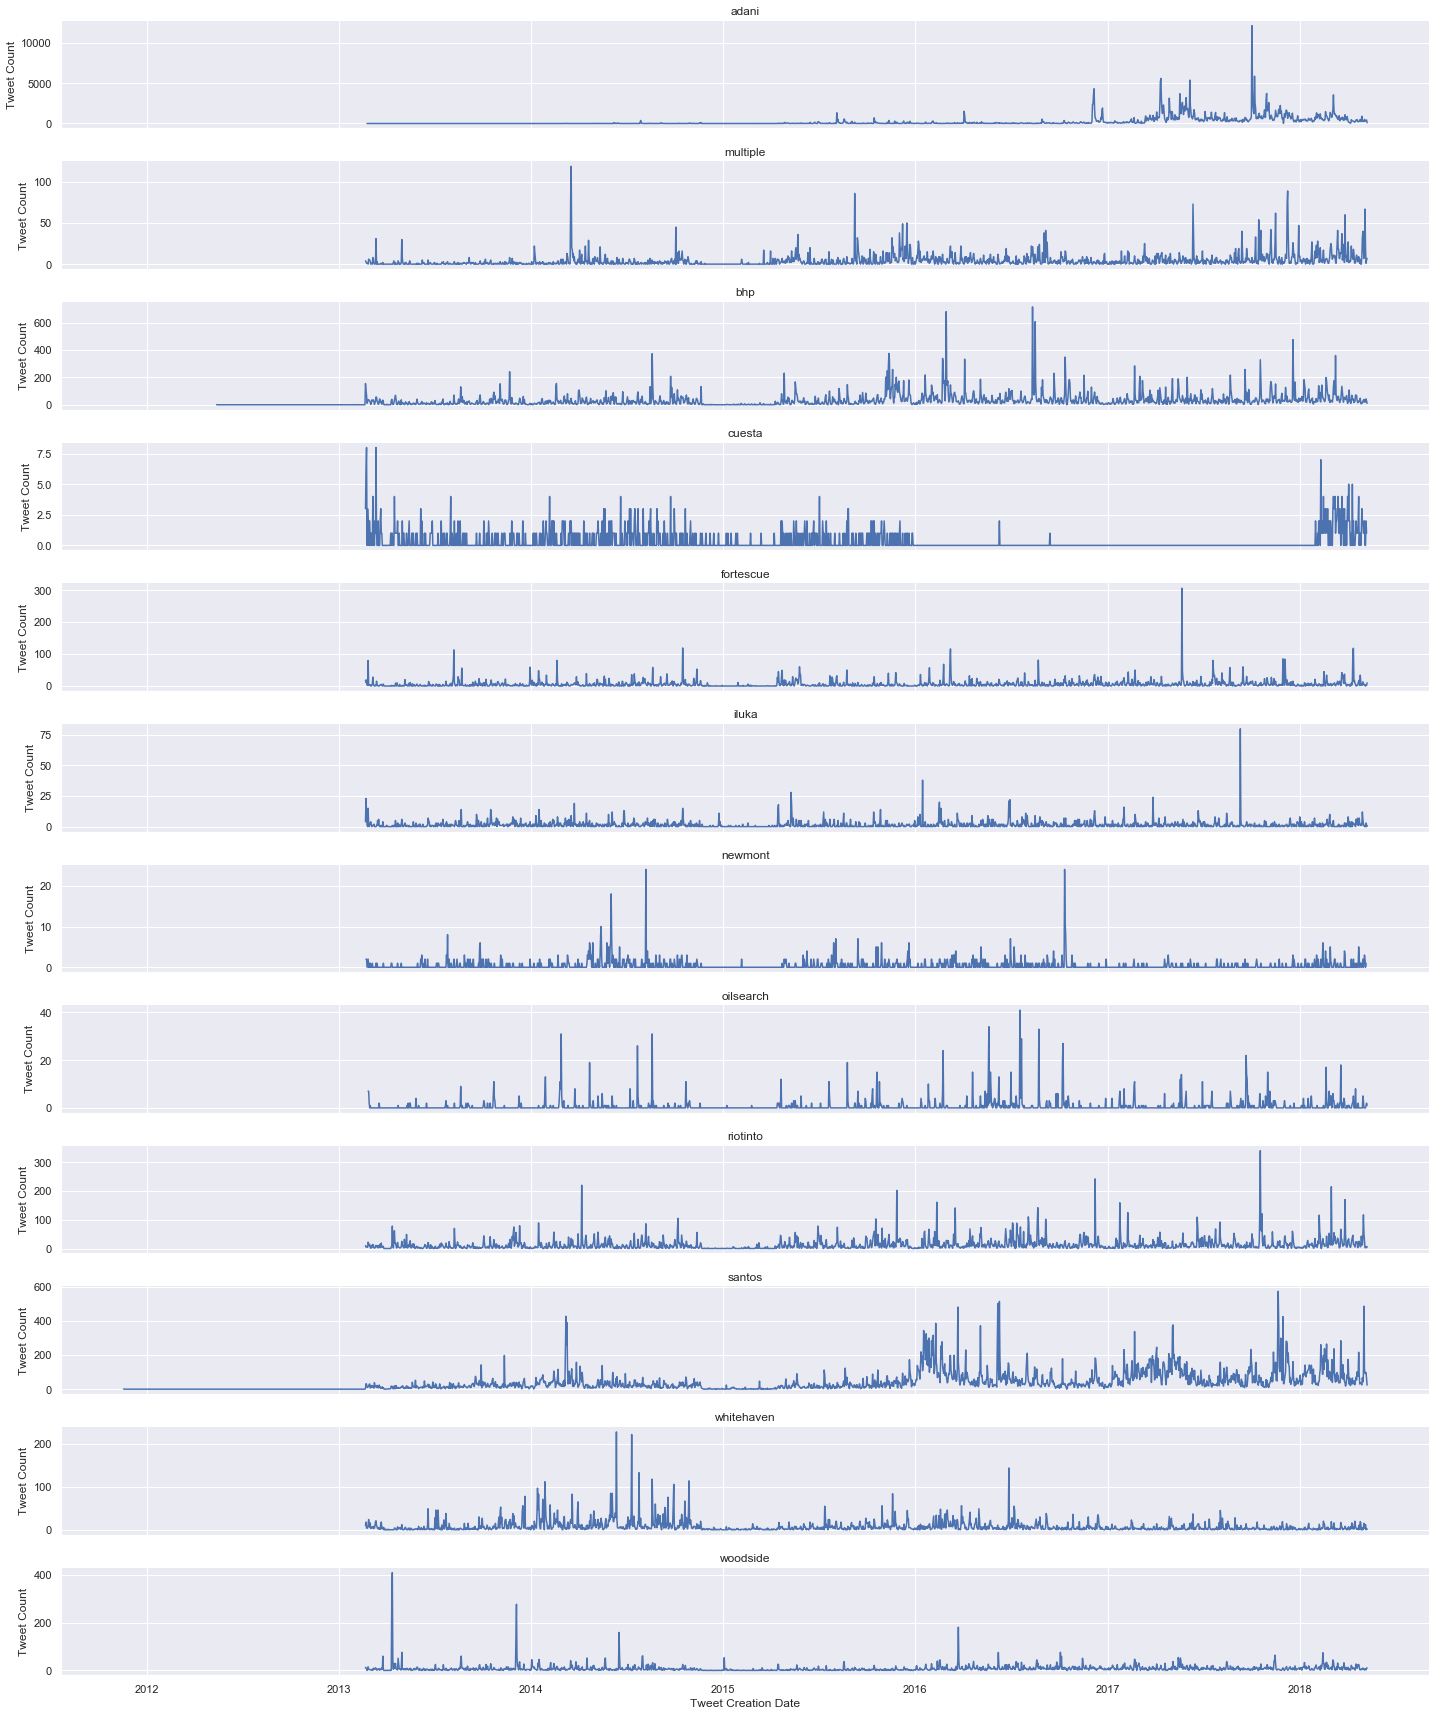

In [4]:
    plt.figure()
    print("Tweet Creation Time-Date Count by Company Association")
    grid = sns.FacetGrid(tweet_dataframe[['tweet_created_at', 'company_derived_designation']],
                         row='company_derived_designation', size=2, aspect=10, sharey=False)
    grid.map_dataframe(tweet_util_v2.ts_plot, 'tweet_created_at')
    grid.set_titles('{row_name}')
    grid.set_xlabels("Tweet Creation Date")
    grid.set_ylabels("Tweet Count")
    plt.show()

<span style="font-family:Papyrus; font-size:1.25em;">

In the first graph, we can see that more of the Tweets were created relatively recently in 2017 and 2018.  The further we go back in time, the fewer Tweets we have.<br>

In the second series of graphs, we can see when the Tweets were created by the company they are associated with.<br>

</span>